## 1. Repositório de dados:
#### https://github.com/CirqueiraLeandro/CLLW-PROJETO-III

## 2. Base de dados:
#### https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

## 3. Contexto e Objetivos.
#### Na indústria cinematográfica, algoritmos de recomendação de filmes têm ganhado importância com a popularidade das plataformas de streaming e o volume de dados gerados nesses serviços. Com a quantidade de conteúdo produzida pelos apps de streaming e a variedade de títulos, encontrar conteúdo relevante com os interesses pessoais de cada um tornou-se um desafio para os usuários.
#### Os objetivos desse projeto são:
####  - Desenvolver um sistema de recomendação de filmes;
####  - Avaliar diferentes algoritmos de recomendação (colaborativos e baseados em conteúdo) para determinar o mais eficiente na recomendação de filmes.
####  - Identificar possíveis inconsistências nos dados, como dados nulos ou incorretos, e propor métodos de correção para garantir a precisão do sistema de recomendação.






## 4. Definição dos pacotes

In [28]:
#Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS
from surprise import Dataset, Reader, SVD, KNNBasic,SVDpp
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import accuracy
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from surprise.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style('darkgrid')

## 5. Análise Exploratória, Tratamento, Preparação e Treinamento dos dados



In [2]:
df = pd.read_csv("movies_metadata.csv")
df.head()

C:\Users\leand\AppData\Local\Temp\ipykernel_16368\1851107641.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### 5.1 Tabela com os metadados

In [4]:

# extrair nome das colunas
nomes_colunas = df.columns.tolist()

# extrair tipos de dados
tipos_dados = df.dtypes.tolist()

# extrair número de valores nulos
num_nulos = df.isnull().sum().tolist()

# criar lista com exemplos de valores e origem dos dados
exemplos = []
for coluna in nomes_colunas:
    exemplo = df[coluna][0]
    exemplos.append(exemplo)
origem = ['movies_metadata'] * len(nomes_colunas)

# criar DataFrame com as informações extraídas
metadata = pd.DataFrame({
    'Variável': nomes_colunas,
    'Tipo': tipos_dados,
    'Exemplo': exemplos,
    '% Nulos': [round((nulos / df.shape[0]) * 100, 2) for nulos in num_nulos],
    'Origem': origem
})

# exibir tabela de metadados
metadata

,Variável,Tipo,Exemplo,% Nulos,Origem
0,adult,object,False,0.00,movies_metadata
1,belongs_to_collection,object,"{'id': 10194, 'name': 'Toy Story Collection', ...",90.12,movies_metadata
2,budget,object,30000000,0.00,movies_metadata
3,genres,object,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",0.00,movies_metadata
4,homepage,object,http://toystory.disney.com/toy-story,82.88,movies_metadata
5,id,object,862,0.00,movies_metadata
6,imdb_id,object,tt0114709,0.04,movies_metadata
7,original_language,object,en,0.02,movies_metadata
8,original_title,object,Toy Story,0.00,movies_metadata
9,overview,object,"Led by Woody, Andy's toys live happily in his ...",2.10,movies_metadata


### 5.2 Análise univariada

In [5]:
print(df.describe().transpose())

                count          mean           std  min   25%   50%    75%  \
revenue       45460.0  1.120935e+07  6.433225e+07  0.0   0.0   0.0    0.0   
runtime       45203.0  9.412820e+01  3.840781e+01  0.0  85.0  95.0  107.0   
vote_average  45460.0  5.618207e+00  1.924216e+00  0.0   5.0   6.0    6.8   
vote_count    45460.0  1.098973e+02  4.913104e+02  0.0   3.0  10.0   34.0   

                       max  
revenue       2.787965e+09  
runtime       1.256000e+03  
vote_average  1.000000e+01  
vote_count    1.407500e+04  


### 5.3 Determinação de outliers

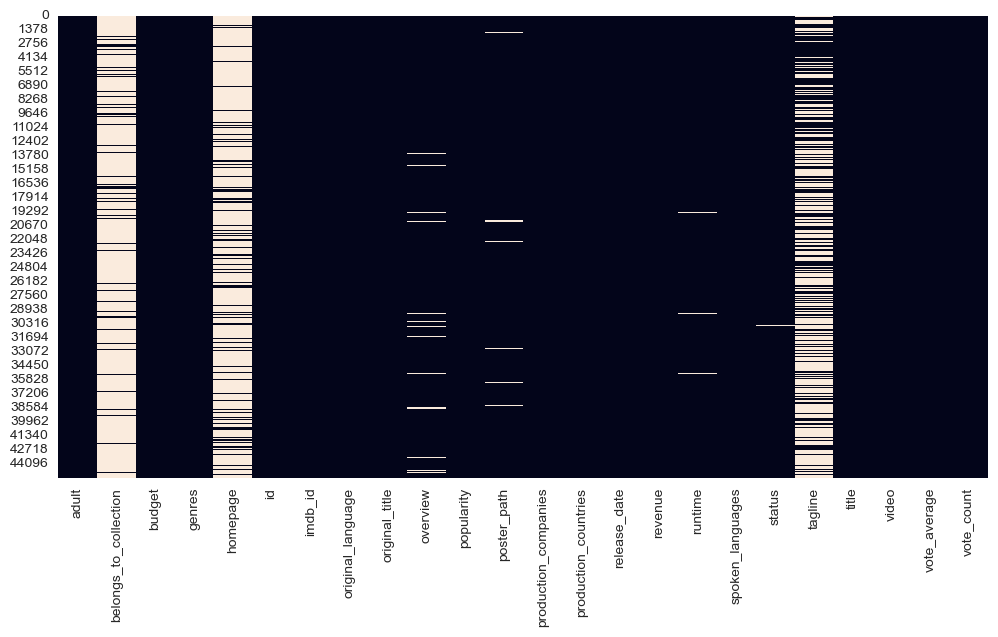

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## 5.4 Tratamento dos dados

In [7]:
# Removendo colunas desnecessarias na análise (imdb_id ,original_title, adult)
df = df.drop(['imdb_id'], axis=1)
df = df.drop('original_title', axis=1)
df = df.drop('adult', axis=1)

(45466, 21)


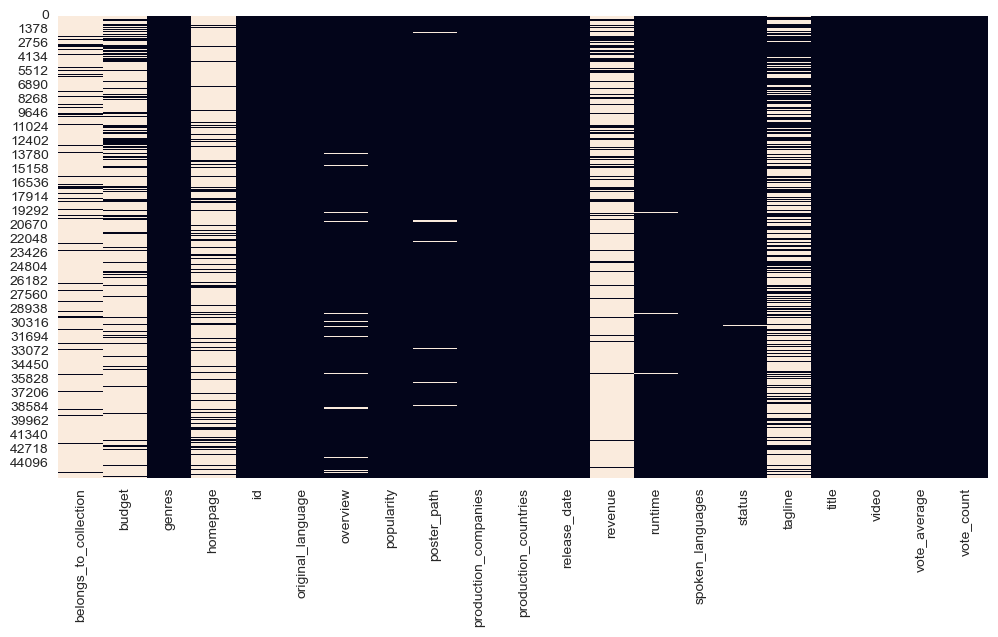

In [8]:
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)



print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## 5.4 Análise Exploratoria

#### Nuvem de palavras

In [9]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title = ' '.join(df['title'])
overview = ' '.join(df['overview'])


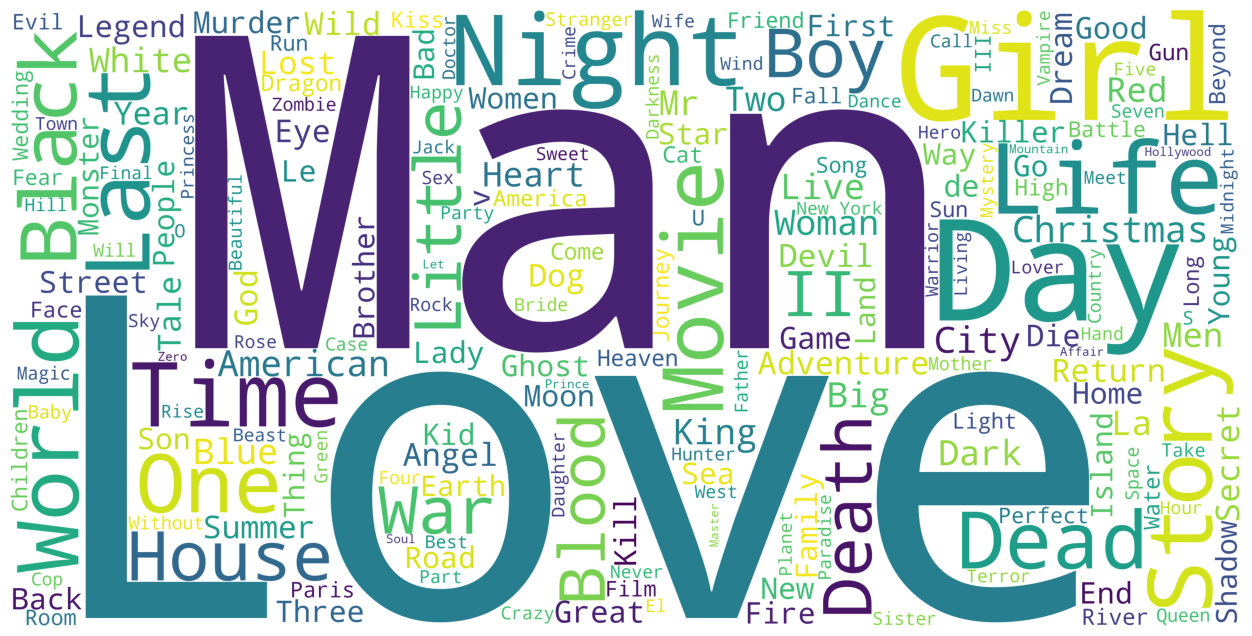

In [10]:
title_nuvem = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title)
plt.figure(figsize=(16,8))
plt.imshow(title_nuvem)
plt.axis('off')
plt.show()

### A palavra "amor" é a mais utilizada em títulos de filmes.
###"Garota", "dia" e "homem" também estão entre as palavras mais recorrentes. Logo, refletindo a grande presença do romance no cinema.


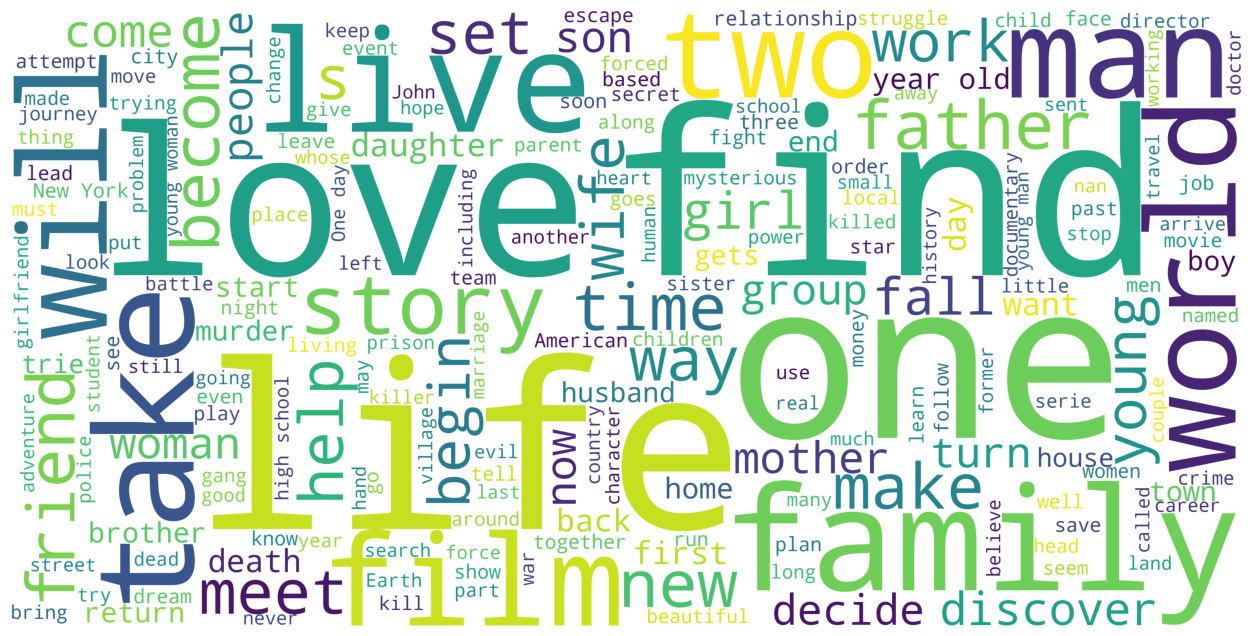

In [11]:
overview_nuvem = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_nuvem)
plt.axis('off')
plt.show()


### A palavra "vida" é a mais usada em sinopses de filmes. 
### "Um" e "encontrar" também são populares. Juntas, com "amor", "homem" e "garota"
### Sendo que essas nuvens de palavras nos ajuda a confirmar a influência do genero de romance no cinema.

#### Popularidade, Contagem de Votos e Média de Votos

##### Popularidade

In [12]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

<Axes: ylabel='Frequency'>

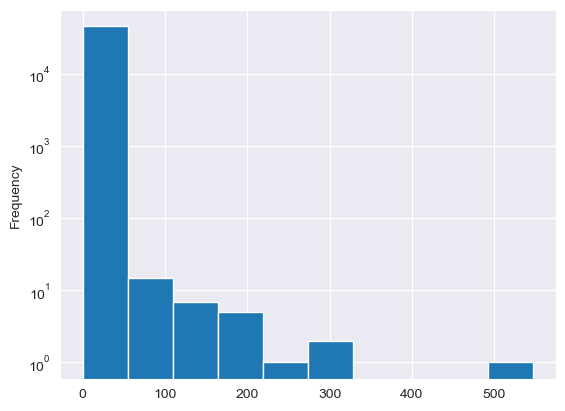

In [13]:
df['popularity'].plot(logy=True, kind='hist')

### A pontuação de popularidade é uma medida altamente desproporcional,
#### com uma média de apenas 2,9, mas podendo atingir valores máximos de até 547, o que representa quase 1800% acima da média.
#### Contudo, como mostrado na distribuição, a grande maioria dos filmes tem uma pontuação de popularidade abaixo de 10.

##### Contagem de votos

In [14]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [15]:
df[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)


### Assim como as pontuações de popularidade, a distribuição de votos é extremamente desigual, com a mediana em apenas 10 votos. 
### O filme mais votado recebeu 14.075 votos. Assim, os votos do TMDB não são tão representativos quanto os do IMDB.
### Mesmo assim, vamos conferir os filmes mais votados no site. "A Origem" e "O Cavaleiro das Trevas", dois grandes sucessos de crítica e bilheteria dirigidos por Christopher Nolan, lideram a lista.

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


##### Média de Votos

In [16]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

C:\Users\leand\AppData\Local\Temp\ipykernel_16368\1411771687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='vote_average', ylabel='Density'>

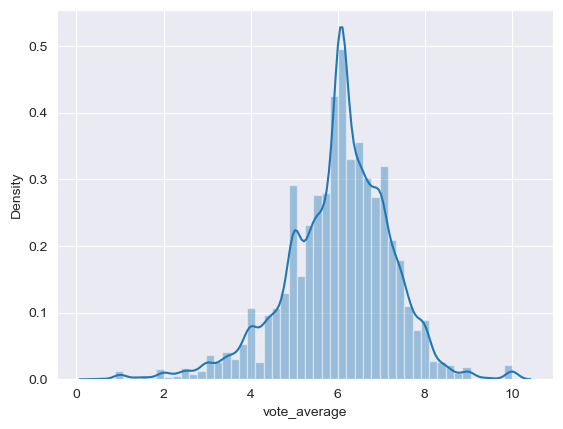

In [17]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

In [18]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ]].sort_values('vote_average', ascending=False).head(10)

### Os usuários do TMDB avaliam os filmes de forma rigorosa, com uma média de 5,6 em 10 e metade das obras recebendo notas de 6 ou menos.
### Ao analisar os filmes mais aclamados no TMDB, considerando apenas aqueles com mais de 2000 votos, "Um Sonho de Liberdade" e "O Poderoso Chefão" se destacam como os melhores.
### Eles também lideram a lista do IMDB, com notas acima de 9 no IMDB e 8,5 no TMDB.


,title,vote_average,vote_count
314,The Shawshank Redemption,8.5,8358.0
834,The Godfather,8.5,6024.0
2211,Life Is Beautiful,8.3,3643.0
5481,Spirited Away,8.3,3968.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
1176,Psycho,8.3,2405.0
2843,Fight Club,8.3,9678.0
1178,The Godfather: Part II,8.3,3418.0
12481,The Dark Knight,8.3,12269.0
292,Pulp Fiction,8.3,8670.0


### 5.6 Preparação, treinamento e avaliação do modelo inicial
### Singular Value Decomposition (SVD)


##### Preparação será feita na base de dados de avaliações, ela contém informações dos usuarios e será usada no modelo inicial como prova de conceito

In [56]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [57]:
### Preparação ###

# Criação do objeto Reader
reader = Reader(rating_scale=(1, 5)) ## armazena a escala de avaliação

# Carregar os dados
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Criar o objeto KFold
kf = KFold(n_splits=5)

# Usar KFold para fazer a validação cruzada, treinando em 4 partes e testando na seguinte
for fold_index, (trainset, testset) in enumerate(kf.split(data), start=1):
    # Criar o modelo SVD
    svd = SVD()
    
    
### Treinar o modelo ###
    svd.fit(trainset)
        
    # Fazer previsões no conjunto de teste
    predictions = svd.test(testset)

### Avaliar o modelo ### 
    
    # Listas para armazenar as acurácias
    rmse_list = []
    mae_list = []
    
    # Calcular RMSE e MAE
    rmse = accuracy.rmse(predictions, verbose=False)  
    mae = accuracy.mae(predictions, verbose=False)   
    
    # Armazenar os resultados
    rmse_list.append(rmse)
    mae_list.append(mae)

    # Exibir resultados de cada fold
    print(f'Fold {fold_index}: RMSE = {rmse:.4f}, MAE = {mae:.4f}')

# Calcular a média das acurácias
mean_rmse = sum(rmse_list) / len(rmse_list)
mean_mae = sum(mae_list) / len(mae_list)

# Exibir os resultados médios
print(f'\nMédia RMSE: {mean_rmse:.4f}')
print(f'Média MAE: {mean_mae:.4f}')

Fold 1: RMSE = 0.8873, MAE = 0.6838
Fold 2: RMSE = 0.9085, MAE = 0.7001
Fold 3: RMSE = 0.9055, MAE = 0.6960
Fold 4: RMSE = 0.8934, MAE = 0.6885
Fold 5: RMSE = 0.8921, MAE = 0.6867

Média RMSE: 0.8921
Média MAE: 0.6867


In [48]:
## Avaliando notas do user 101
ratings[ratings['userId'] == 101].head()

,userId,movieId,rating,timestamp
15298,101,145,3.5,1292402318
15299,101,163,2.5,1292402288
15300,101,172,2.5,1292402307
15301,101,196,3.5,1292402305
15302,101,260,4.0,1292402500


In [58]:
## Verificando os resultados do sistema de recomendação
svd.predict(101, 260, 4)

Prediction(uid=101, iid=260, r_ui=4, est=4.329976314421221, details={'was_impossible': False})

### 5.7 Preparação do modelo melhorado
### Sistema Hibrido

In [24]:
#Usando GridSearchCV para encontrar melhores parâmetros
 
param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [20, 50, 100],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Obter os melhores parâmetros RMSE
best_params_rmse = gs.best_params['rmse']
print(f"Melhores parâmetros encontrados para RMSE: {best_params_rmse}")

# Obter os melhores parâmetros RMSE
best_params_mae = gs.best_params['mae']
print(f"Melhores parâmetros encontrados para MAE: {best_params_mae}")

Melhores parâmetros encontrados para RMSE: {'n_factors': 100, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}
Melhores parâmetros encontrados para MAE: {'n_factors': 100, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


In [50]:
### Preparação com melhoria RMSE e MAE ###

# Criação do objeto Reader
ratings = pd.read_csv('ratings_small.csv')
reader = Reader(rating_scale=(1, 5)) ## armazena a escala de avaliação

# Carregar os dados
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Criar o objeto KFold
kf = KFold(n_splits=5)

# Usar KFold para fazer a validação cruzada, treinando em 4 partes e testando na seguinte
for fold_index, (trainset, testset) in enumerate(kf.split(data), start=1):
    # Criar o modelo SVD com os melhores parâmetros
    svd = SVD(**best_params_rmse)

    
### Treinar o modelo ###
    svd.fit(trainset)
        
    # Fazer previsões no conjunto de teste
    predictions = svd.test(testset)

### Avaliar o modelo ### 
    
    # Listas para armazenar as acurácias
    rmse_list = []
    mae_list = []
    
    # Calcular RMSE e MAE
    rmse = accuracy.rmse(predictions, verbose=False)  
    mae = accuracy.mae(predictions, verbose=False)   
    
    # Armazenar os resultados
    rmse_list.append(rmse)
    mae_list.append(mae)

    # Exibir resultados de cada fold
    print(f'Fold {fold_index}: RMSE = {rmse:.4f}, MAE = {mae:.4f}')

# Calcular a média das acurácias
mean_rmse = sum(rmse_list) / len(rmse_list)
mean_mae = sum(mae_list) / len(mae_list)

# Exibir os resultados médios
print(f'\nMédia RMSE: {mean_rmse:.4f}')
print(f'Média MAE: {mean_mae:.4f}')

Fold 1: RMSE = 0.8747, MAE = 0.6710
Fold 2: RMSE = 0.8766, MAE = 0.6725
Fold 3: RMSE = 0.8764, MAE = 0.6770
Fold 4: RMSE = 0.8669, MAE = 0.6647
Fold 5: RMSE = 0.8740, MAE = 0.6706

Média RMSE: 0.8740
Média MAE: 0.6706


In [53]:
## Verificando os resultados do sistema de recomendação com parâmetros melhorados
svd.predict(101, 260, 4)

Prediction(uid=101, iid=260, r_ui=4, est=4.306934475713349, details={'was_impossible': False})

In [64]:
### SVD com melhores parâmetros + KNNBasic ### Stacking Ensemble

# Criação do objeto Reader
ratings = pd.read_csv('ratings_small.csv')
reader = Reader(rating_scale=(1, 5)) ## armazena a escala de avaliação

# Carregar os dados
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Criar o objeto KFold
kf = KFold(n_splits=5)

# Listas para armazenar as previsões e as avaliações reais
X_meta = []  # Características de entrada para o modelo meta
y_meta = []  # Avaliações reais

# Usar KFold para fazer a validação cruzada, treinando em 4 partes e testando na seguinte
for fold_index, (trainset, testset) in enumerate(kf.split(data), start=1):
    # Criar e treinar o modelo SVD com os melhores parâmetros
    svd = SVD(**best_params_rmse)
    svd.fit(trainset)
    
    # Criar e treinar o modelo KNN
    knn = KNNBasic()
    knn.fit(trainset)
    
    # Fazer previsões no conjunto de teste com ambos os modelos
    predictions_svd = svd.test(testset)
    predictions_knn = knn.test(testset)

    # Coletar as previsões e as avaliações reais
    for svd_pred, knn_pred in zip(predictions_svd, predictions_knn):
        X_meta.append([svd_pred.est, knn_pred.est])  # Adiciona as previsões de SVD e KNN como entrada para o modelo meta
        y_meta.append(svd_pred.r_ui)  # Adiciona a avaliação real (r_ui)

# Converter listas para arrays numpy
X_meta = np.array(X_meta)
y_meta = np.array(y_meta)

# Treinar o modelo meta com os dados de entrada e as avaliações reais
meta_model = LinearRegression()
meta_model.fit(X_meta, y_meta)

# Fazer previsões com o modelo meta
meta_predictions = meta_model.predict(X_meta)

# Calcular e exibir as métricas RMSE e MAE do modelo meta
rmse_meta = np.sqrt(((meta_predictions - y_meta) ** 2).mean())
mae_meta = np.abs(meta_predictions - y_meta).mean()

print(f'\nMédia RMSE do modelo Stacking: {rmse_meta:.4f}')
print(f'Média MAE do modelo Stacking: {mae_meta:.4f}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

Média RMSE do modelo Stacking: 0.8723
Média MAE do modelo Stacking: 0.6702


In [72]:
# Função para fazer uma previsão com o modelo Stacking Ensemble
def stacking_predict(user_id, item_id):
    # Prever com o modelo SVD
    svd_pred = svd.predict(user_id, item_id).est  # Estimativa do modelo SVD
    
    # Prever com o modelo KNN
    knn_pred = knn.predict(user_id, item_id).est  # Estimativa do modelo KNN
    
    # Criar a entrada para o modelo meta usando as previsões dos modelos base
    X_meta_input = np.array([[svd_pred, knn_pred]])
    
    # Prever com o modelo meta
    meta_prediction = meta_model.predict(X_meta_input)[0]
    
    return meta_prediction

## Verificando os resultados do sistema de recomendação Stacking Ensemble (SVD + KNN)
# Avaliação de user_id=101 e movie_id=21
user_id = 101
item_id = 260
stacked_prediction = stacking_predict(user_id, item_id)
print(f"Predição com Stacking Ensemble para user_id={user_id} e item_id={item_id}: {stacked_prediction:.4f}")


Predição com Stacking Ensemble para user_id=101 e item_id=260: 4.3968
